In [2]:
import sklearn

In [3]:
import pandas as pd
import json
import numpy as np
import ast  
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm
from scipy.sparse import hstack
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score





In [4]:
df_fake= pd.read_csv('../data/Fake.csv')  # Example dataset
df_true = pd.read_csv('../data/True.csv')


In [5]:
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [6]:
df_fake['label'] = 1  # Fake news = 1
df_fake.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1


In [7]:
df_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [8]:
df_true['label'] = 0 # Real news = 0
df_true.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0


In [9]:
df_news = pd.concat([df_fake, df_true], ignore_index=True)
df_news

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1
...,...,...,...,...,...
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",0
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",0
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",0
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",0


In [10]:
df_news = df_news.drop(['date','subject'],axis=1)
df_news

,title,text,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,1
...,...,...,...
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,0
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",0
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,0
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,0


In [85]:
import re

def clean_text(text):
    text = text.lower()  # lowercase everything
    text = re.sub(r"http\S+", "", text)  # remove URLs
    text = re.sub(r"\d+", "", text)  # remove numbers
    text = re.sub(r"[^\w\s]", "", text)  # remove punctuation
    text = re.sub(r"\s+", " ", text).strip()  # remove extra whitespace
    return text

df_news['clean_text'] = df_news['title'] + " " + df_news['text']
df_news['clean_text'] = df_news['clean_text'].apply(clean_text)
df_news


,title,text,label,clean_text
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,1,donald trump sends out embarrassing new years ...
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,1,drunk bragging trump staffer started russian c...
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",1,sheriff david clarke becomes an internet joke ...
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",1,trump is so obsessed he even has obamas name c...
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,1,pope francis just called out donald trump duri...
...,...,...,...,...
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,0,fully committed nato backs new us approach on ...
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",0,lexisnexis withdrew two products from chinese ...
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,0,minsk cultural hub becomes haven from authorit...
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,0,vatican upbeat on possibility of pope francis ...


In [86]:
# Remove "reuters" as it has a great importnace on the model
def remove_reuters(text):
    return re.sub(r'\breuters\b', '', text.lower())

# Apply "reuters" remover after clean_text
df_news['clean_text'] = df_news['clean_text'].apply(remove_reuters)
df_news

,title,text,label,clean_text
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,1,donald trump sends out embarrassing new years ...
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,1,drunk bragging trump staffer started russian c...
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",1,sheriff david clarke becomes an internet joke ...
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",1,trump is so obsessed he even has obamas name c...
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,1,pope francis just called out donald trump duri...
...,...,...,...,...
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,0,fully committed nato backs new us approach on ...
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",0,lexisnexis withdrew two products from chinese ...
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,0,minsk cultural hub becomes haven from authorit...
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,0,vatican upbeat on possibility of pope francis ...


In [87]:
# Count how many rows still contain the word "reuters"
remaining = df_news['clean_text'].str.contains(r'\breuters\b', case=False).sum()
print(f"Number of rows still containing 'reuters': {remaining}")


Number of rows still containing 'reuters': 0


In [88]:
X = df_news['clean_text']
y = df_news['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [89]:
# TF-IDF vectorization
vectorizer = TfidfVectorizer(ngram_range=(1, 3), stop_words="english", max_features=5000, max_df=0.85, min_df=3, norm='l2')

#Hypertuning
#max_features = 100
# vectorizer = TfidfVectorizer(ngram_range=(1, 3), stop_words="english", max_features=100, max_df=0.85, min_df=3, norm='l2')
#max_features = 500
# vectorizer = TfidfVectorizer(ngram_range=(1, 3), stop_words="english", max_features=500, max_df=0.85, min_df=3, norm='l2')
# #max_features = 1000
# vectorizer = TfidfVectorizer(ngram_range=(1, 3), stop_words="english", max_features=1000, max_df=0.85, min_df=3, norm='l2')

X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [90]:
from sklearn.svm import LinearSVC
#Hypertuning
#C=0.01 
# svm_model = svm.LinearSVC(C=0.01) 
#C=0.10
# svm_model = svm.LinearSVC(C=0.10) 
#C=10
# svm_model = svm.LinearSVC(C=10) 

svm_model = svm.LinearSVC(C=1.0) 
svm_model.fit(X_train_tfidf, y_train)

LinearSVC()

In [91]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(svm_model, X_train_tfidf, y_train, cv=5, scoring='f1_macro')
print("5-Fold Cross-Validated F1 Macro:", scores.mean())


5-Fold Cross-Validated F1 Macro: 0.9906542905693568


In [92]:
y_pred = svm_model.predict(X_test_tfidf)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.9916481069042317


In [93]:
print("Classification Report:")
print(classification_report(y_test, y_pred,digits=5))

Classification Report:
              precision    recall  f1-score   support

           0    0.99159   0.99090   0.99124      4284
           1    0.99170   0.99233   0.99202      4696

    accuracy                        0.99165      8980
   macro avg    0.99165   0.99162   0.99163      8980
weighted avg    0.99165   0.99165   0.99165      8980



In [94]:
import matplotlib.pyplot as plt
import seaborn as sns

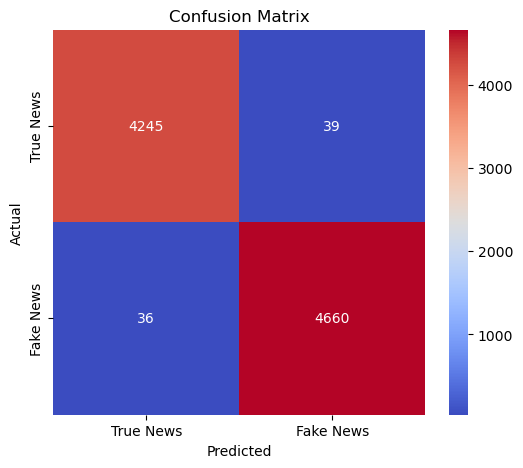

In [95]:
# Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', xticklabels=["True News", "Fake News"], yticklabels=["True News", "Fake News"])
plt.ylabel("Actual")
plt.xlabel('Predicted')
plt.title("Confusion Matrix")
plt.show()

ROC AUC Score: 0.99955


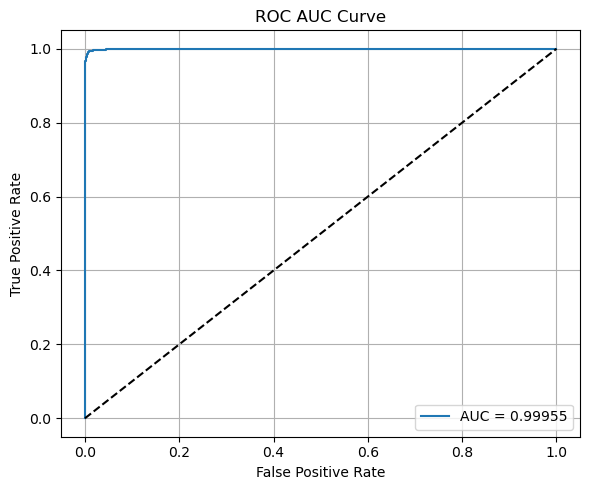

In [96]:
# ROC-AUC Curve
from sklearn.metrics import roc_curve, roc_auc_score


# For SVM: get decision scores instead of predicted labels
y_prob = svm_model.decision_function(X_test_tfidf)

# Calculate FPR, TPR and ROC AUC
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC AUC Score: {roc_auc:.5f}")


# Plot ROC curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.5f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


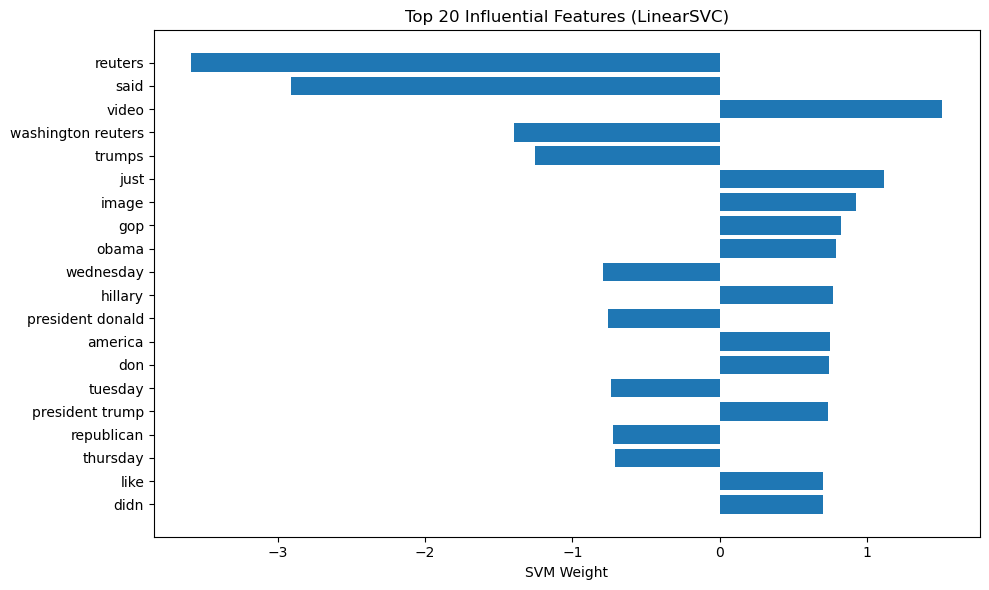

In [35]:
# Get feature names from TF-IDF
feature_names = np.array(vectorizer.get_feature_names_out())

# Get absolute weights from the SVM model
coefs = svm_model.coef_[0]  # shape: (n_features,)
abs_coefs = np.abs(coefs)

# Get indices of top 20 features
top_n = 20
top_indices = np.argsort(abs_coefs)[-top_n:][::-1]  # top 20, descending

# Extract names and scores
top_features = feature_names[top_indices]
top_weights = coefs[top_indices]

# Plot
plt.figure(figsize=(10, 6))
plt.barh(range(top_n), top_weights, align='center')
plt.yticks(range(top_n), top_features)
plt.gca().invert_yaxis()
plt.xlabel("SVM Weight")
plt.title("Top 20 Influential Features (LinearSVC)")
plt.tight_layout()
plt.show()